In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../logs/fig_1_20230423-175828.csv')
data

,Operation,Size (MB),Ratio,Latency,Throughput
0,WRITE,8192,1.0,6.02,135421.00
1,WRITE,8192,0.8,5.93,137353.00
2,WRITE,16384,1.0,7.05,125097.00
3,WRITE,16384,0.8,7.57,117201.00
4,WRITE,24576,1.0,8.64,105595.00
5,WRITE,24576,0.8,9.03,101452.00
6,WRITE,32768,1.0,9.56,96714.10
7,WRITE,32768,0.8,9.87,94011.30
8,SHORT SCAN,8192,1.0,78.22,6498.04
9,SHORT SCAN,8192,0.8,86.87,6132.45


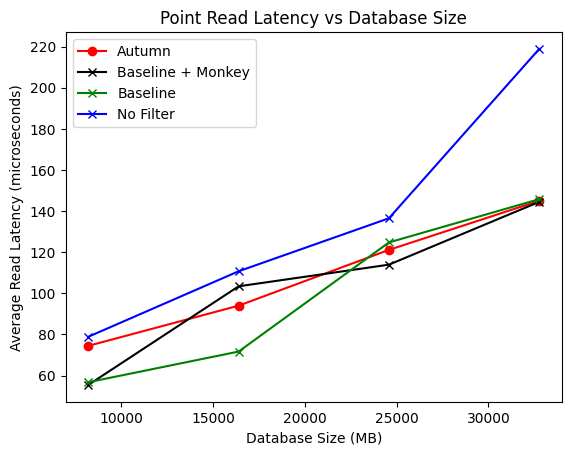

In [3]:
reads = data[data["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]
full_baseline_reads = data[data["Operation"] == "READ NO MONKEY"]
full_reads_nofilter = data[data["Operation"] == "READ NO FILTER"]
base_reads_nofilter = full_reads_nofilter[full_reads_nofilter["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")
plt.plot(full_baseline_reads.loc[:, "Size (MB)"], full_baseline_reads.loc[:, "Latency"], marker='x', color="green")
plt.plot(base_reads_nofilter.loc[:, "Size (MB)"], base_reads_nofilter.loc[:, "Latency"], marker='x', color="blue")



plt.title("Point Read Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline + Monkey", "Baseline", "No Filter"])
# # plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")



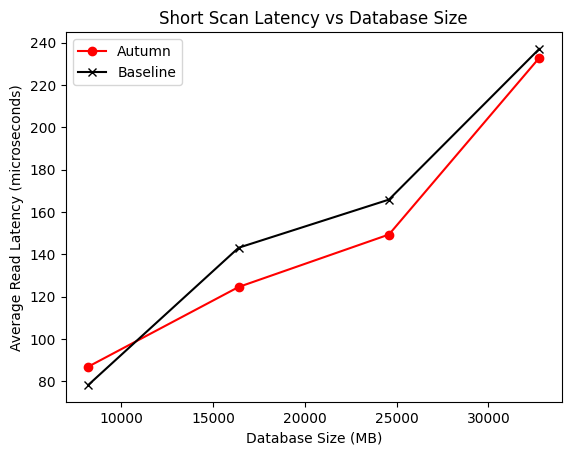

In [4]:
reads = data[data["Operation"] == "SHORT SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Short Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

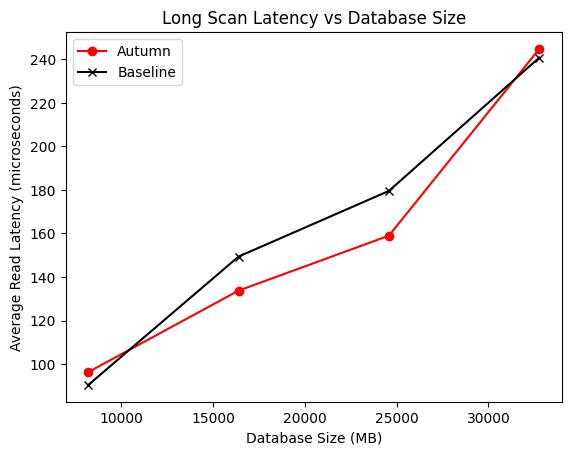

In [5]:
reads = data[data["Operation"] == "LONG SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Long Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

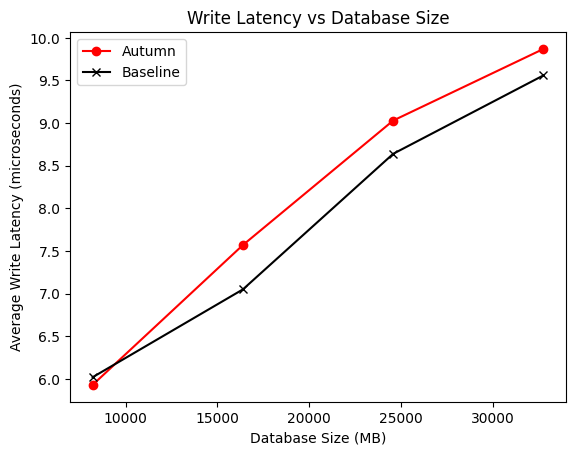

In [6]:
reads = data[data["Operation"] == "WRITE"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Write Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Write Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

In [ ]:
data2 = pd.read_csv('../logs/space_amp_20230329-192055.csv')
data2


In [ ]:
base = data2[data2["Ratio"] == 1]
test = data2[data2["Ratio"] < 1]

plt.plot(test.loc[:, "Value Size"], test.loc[:, "Actual Size"], marker= 'o', color="red")
plt.plot(base.loc[:, "Value Size"], base.loc[:, "Actual Size"], marker='x', color="black")


plt.title("Value Size vs DB Size")
plt.xlabel("Value Size (bytes)")
plt.ylabel("Actual Database Size (bytes)")
plt.legend(["Autumn", "Baseline"])